# Importing All Required Library

In [1]:
import pandas as pd #pd is the alias
import numpy as np 
import datetime
from os import listdir 
from os.path import isfile, join
import glob 
import re
import plotly.graph_objects as go
import matplotlib.pyplot as plt # Use for plotting. "plt" is an alias for calling matplotlib.pyplot
from matplotlib import style # to set the grid style 
import matplotlib.animation as animation
%matplotlib inline

In [2]:
#importing library 
# !pip install plotly 
import seaborn as sns 
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

Read csv file using Dataframe

In [3]:
#read csv file
free_session_data = pd.read_csv("free_session_information.csv")
free_session_data.head()

,Unnamed: 0,Timestamp,Name,Contact,Email,College,Department,HasLaptop,Source,Country
0,0,8/24/2020 17:01:39,A.S.M. Raquibul Hasan,01722577922,raquibul.nsu@gmail.com,United International University,others,Yes,Facebook,Bangladesh
1,1,8/24/2020 10:08:54,Abdullah,NaN,sharif3abdullah@gmail.com,IIT,Engineering,NaN,NaN,Bangladesh
2,2,8/24/2020 9:20:28,Abdullah Bin Murad,01552443554,abmrifat54@gmail.com,Shahjalal University of Science and Technology,Engineering,Yes,NaN,Bangladesh
3,3,7/28/2020 12:16:30,Abhijoy Mukherjee,7003206060,abhijoymukherjee01@gmail.com,Asutosh College,Statistics,Yes,Friend,India
4,4,7/10/2020 13:56:14,Abhipreeti Acharjee,8274839744,deepamandal007@gmail.com,"DEPARTMENT OF PURE MATHEMATICS, UNIVERSITY OF ...",PURE MATHEMATICS,Yes,NaN,India


In [4]:
#remove the Unnamed 0 column
free_session_data.drop(['Unnamed: 0'], axis = 1, inplace = True)
#reset the index
free_session_data.reset_index(drop=True)
#total null values sum
free_session_data.isna().sum()

Timestamp      20
Name           21
Contact        59
Email          22
College        28
Department     35
HasLaptop      28
Source        536
Country       492
dtype: int64

In [5]:
#total columns
free_session_data.columns

Index(['Timestamp', 'Name', 'Contact', 'Email', 'College', 'Department',
       'HasLaptop', 'Source', 'Country'],
      dtype='object')

In [6]:
free_session_data.shape

(968, 9)

# Drop all the rows where all of the columns values are NaN

In [7]:
# using dropna() function    
free_session_data1 = free_session_data.dropna(how = 'all')
free_session_data2 = free_session_data1.reset_index(drop=True)

In [8]:
free_session_data2[free_session_data2['Name'].isnull()]

,Timestamp,Name,Contact,Email,College,Department,HasLaptop,Source,Country
850,Maulana Azad boot camp form 23th of jan onwars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


this rows will not be usefull for use as here all of them are NaN values except Timestamp.
Another thing timestamp value also are not well formatted

removing this specifc rows

In [9]:
#removing this specifc rows
free_session_data3 = free_session_data2.dropna(subset=['Name'])

now it is not available in the dataframe

# lower string method make the all string lower
remove all extra space in string

In [10]:
def lower_string(mystring):
    '''
    mystring is the total text of a columns where multiple white space are beeing removed and lower the all charecters
    '''
    while '  ' in mystring:
        mystring = mystring.replace('  ', ' ')
    mystring = mystring.lower()
    mystring = mystring.strip()
    return mystring

# This is the trace bar function
for more readability and making good coding practice make this when we need barchart visualization need to just call the function with parameter values

In [11]:
def draw_trace_bar(data,data_index, feature, title, xlab, ylab,color='Blue'):
    '''
    this is the function created using plotly for draw a trace bar where
    data is main dataframe
    data index is x label values
    feature is y label values
    '''
    data = data.sort_values(feature, ascending=False)
    trace = go.Bar(
            x = data[data_index],
            y = data[feature],
            marker=dict(color=color),
            text=data[data_index]
        )
    data = [trace]

    layout = dict(title = title,
              xaxis = dict(title = xlab, showticklabels=True, tickangle=45, 
                           zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                           showline=True, linewidth=2, linecolor='black', mirror=True,
                          tickfont=dict(
                            size=10,
                            color='red'),), 
              yaxis = dict(title = ylab, gridcolor='lightgrey', zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                          showline=True, linewidth=2, linecolor='black', mirror=True),
              plot_bgcolor = 'rgba(0, 0, 0, 0)', paper_bgcolor = 'rgba(0, 0, 0, 0)',
              hovermode = 'closest'
             )
    fig = dict(data = data, layout = layout)
    iplot(fig, filename='draw_trace')

# We are taking the University data from which University students attends the most
 we will be workinng on college columns data

In [12]:
#drop na values from college and department rows
college_data = free_session_data3.dropna(subset=['College'])
#converting the college and department values into string
college_data.College = college_data.College.astype(str)
#applying the lower string method
college_data['College'] = college_data.apply(lambda row : lower_string(row['College']), axis = 1)

In [13]:
#collega data counting all college
college = college_data.groupby('College')['College'].agg('count')
college= pd.DataFrame(college)
#renameing to total_counts of department data
college.rename(columns={"College": "counts"},inplace=True)
#convert Department index to columns
college.reset_index(inplace= True)
college

,College,counts
0,1998,1
1,aasansol girls' college,1
2,academy of technology,4
3,acharya institute of management and sciences,1
4,ahsanullah university of science and technology,2
...,...,...
295,"vivekananda college,thakurpukur",2
296,west bengal state university,1
297,west bengal university of health sciences,1
298,women's collage,1


In [14]:
college.shape
print(f'Total {len(college)} college are unique')

Total 300 college are unique


taking the all unique college and counts them total
we are taking data which counts are greater than 5 for better viewing angle

In [15]:
collegetop = college[college['counts'] > 5]

In [16]:
#tracebar free session students present from unique university name
draw_trace_bar(collegetop,'College','counts','Free Session Student Pressent according to College', 'University Name','Total Students',"lightgreen")

# Here is a problem we can see that most of the college name are repating after applying groupby and counts.

Now solving this repating problem convert the dataframe in csv make the all correction for college repating.
the problem is now solved

In [17]:
# college1 = college.sort_values(by = 'College', ascending=True)
# college1.to_csv(r'college_count1.csv', index = False)

after correcting the all reapting college name now we will read them count them according to college

In [18]:
#read csv file
university = pd.read_csv("college_count1.csv")
university.head()

,College,counts
0,1998,1
1,aasansol girls' college,1
2,academy of technology,4
3,acharya institute of management and sciences,1
4,ahsanullah university of science and technology,2


In [19]:
#here unique_college contain all college names uniques
#totalsum contains total counts of uniques college
unique_college = set(dic['College'] for index, dic in university.iterrows())
print(f'Total unique university is now : {len(unique_college)}')
sum = 0
totalsum = []
for x in unique_college:
    for index,d in university.iterrows():
        if d['College'] == x:
            sum = sum + d['counts']
    totalsum.append((x, sum))
    sum = 0

Total unique university is now : 159


In [20]:
#now this totalsum to make iit dataframe
university_name = pd.DataFrame(totalsum)
#name the columns University and counts
university_name.columns = ['University', 'counts']
university_name.reset_index(drop=True)
#sort the values
university_name.sort_values('counts', ascending=False)

,University,counts
20,lady brabourne college,139
6,maulana azad college,111
15,regent education and research foundation,109
62,b p poddar institute of management & technology,45
35,durgapur woman's college,35
...,...,...
56,surendranath college,1
55,acharya institute of management and sciences,1
54,raniganj girls' college,1
50,women's collage,1


In [21]:
# university_top_participate greater than 10 total counts
university_top_participate = university_name[university_name['counts'] > 10]
university_top_participate1 = university_top_participate.sort_values('counts', ascending=False)
# university_less_participate smaller than 10 total counts
university_less_participate = university_name[university_name['counts'] < 10]
university_less_participate1 = university_less_participate.sort_values('counts', ascending=False)

Text(0, 0.5, 'University Name')

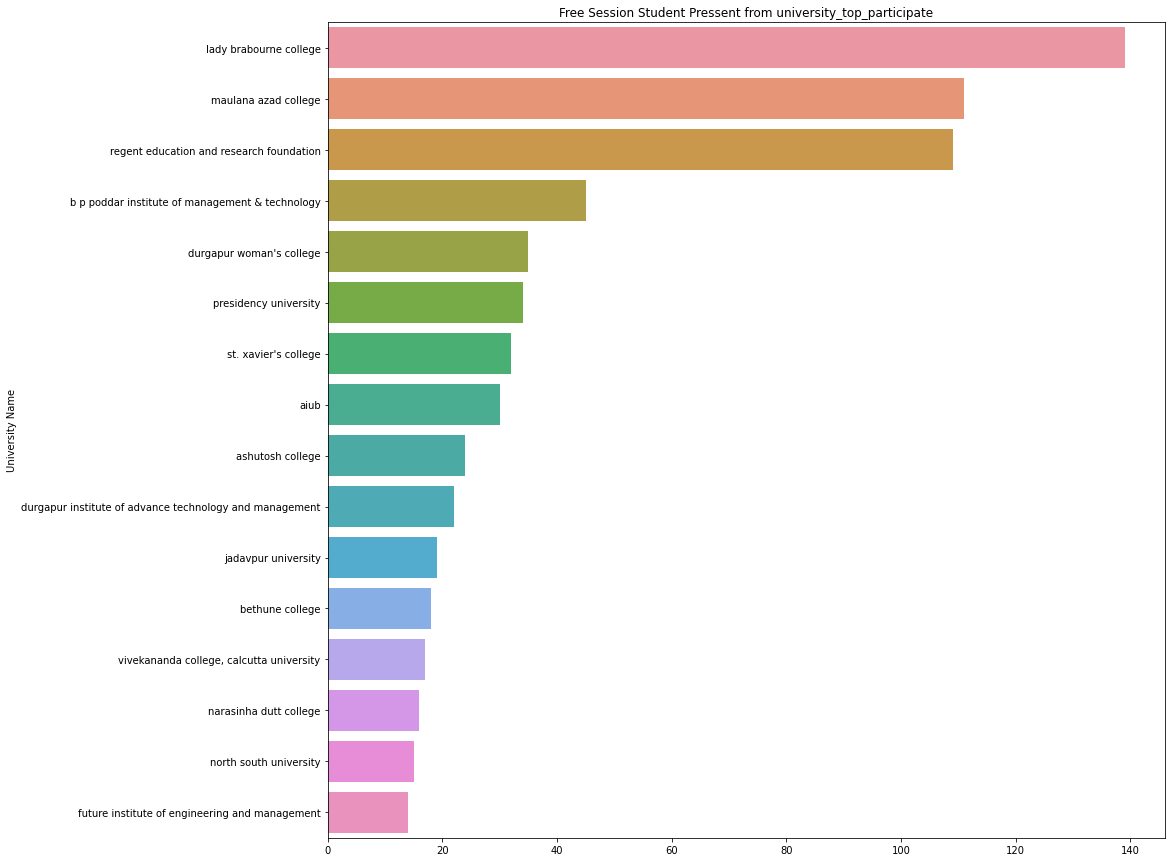

In [22]:
# Set the width and height of the figure
plt.figure(figsize=(15,15))
# Add title
plt.title("Free Session Student Pressent from university_top_participate")
# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(y= university_top_participate1["University"].tolist(), x=university_top_participate1["counts"].tolist())
# Add label for vertical axis
plt.ylabel("University Name")

# Most of the students come from lady braboume college(139) , maluna azad college (111) respectively
Now if we take a look into the above barchart there is no repating any college or university name more than one. 
now it visualize the more about the data here only showing top participente University where participate was more than 10 students. 

In [23]:
draw_trace_bar(university_less_participate,'University','counts','Free Session Student Pressent from university_less_participate', 'University Name','Total Students',"lightgreen")

now it visualize the more about the data here only showing less participente University where participate was less than 10 stundet. we can take any decisions from this data for improving the participate where is less.

# We are taking the Department data from which department students attends the most
 we will be workinng on department columns data

In [24]:
department_data = free_session_data3.dropna(subset=['Department'])
department_data.Department = department_data.Department.astype(str)
department_data['Department'] = department_data.apply(lambda row : lower_string(row['Department']), axis = 1)

In [25]:
# department data counting from all department
department = department_data.groupby('Department')['Department'].agg('count')
department= pd.DataFrame(department)
#renameing to total_counts of department data
department.rename(columns={"Department": "dep_counts"},inplace=True)
#convert Department index to columns
department.reset_index(inplace= True)
department.shape

(157, 2)

taking the all unique department and counts them

In [26]:
departmenttop = department[department['dep_counts'] > 2 ]
departmenttop

,Department,dep_counts
26,b.sc statistics honours,4
31,b.tech,4
43,bba,11
44,bca,6
50,bsc statistics hons,3
65,computer science,6
66,computer science and engineering,5
67,computer science engineering,3
68,cse,3
72,ece,3


# here total unique department is almost 157 actually they are not unique
same department name are repating as  many times in different way

In [27]:
draw_trace_bar(departmenttop,'Department','dep_counts','Free Session Student Pressent according to Department', 'Department Name','Total Students',"red")

# Here is a problem we can see that most of the department name are repating after applying groupby and counts.
we convert this dataframe to csv file and try as much as for reduce the repating department name

In [28]:
# department_name_all = department.sort_values(by = 'Department', ascending=True)
# department_name_all.to_csv(r'department_name_all.csv', index = False)

In [29]:
#read csv file
department_names = pd.read_csv("department_name_all.csv")
print(f' total unique department is {len(department_names)}')

 total unique department is 156


finally i did it from 157 to 41 unique departmnet name. 

In [30]:
# unique dep contain all unique departmnet name
unique_dep = set(dic['Department'] for index, dic in department_names.iterrows())
print(f' total unique department is Now: {len(unique_dep)}')
sum = 0
#totalsum_unique_dep counts the total unique dep
totalsum_unique_dep = []
for x in unique_dep:
    for index,d in department_names.iterrows():
        if d['Department'] == x:
            sum = sum + d['dep_counts']
    totalsum_unique_dep.append((x, sum))
    sum = 0

 total unique department is Now: 41


In [31]:
dep_name = pd.DataFrame(totalsum_unique_dep)
dep_name.columns = ['department', 'counts']
dep_name.reset_index(drop=True)
dep_name.sort_values('counts', ascending=False)
dep_name.shape

(41, 2)

In [32]:
#deperment_top_participate greater than or equal 10 person
dep_top_participate = dep_name[dep_name['counts'] >= 10]
dep_top_participate1 = dep_top_participate.sort_values('counts', ascending=False)
#deperment_less_participate less than 10 person
dep_less_participate = dep_name[dep_name['counts'] < 10]
dep_less_participate1 = dep_less_participate.sort_values('counts', ascending=False)

In [33]:
import plotly.express as px
data = dict(
    department_name = dep_top_participate1['department'],
    counts = dep_top_participate1['counts'],
    )
fig = px.funnel(data, x='counts', y='department_name')
fig.show()

# Most of the students are from Honors(Bsc/Msc)-(347) then Engineering student(188)
now we reduce the department name now it makes sense.
for taking any decisions we can look data take decisions as required. here is showing participate students from more than 5 students according to department.

In [34]:
draw_trace_bar(dep_less_participate,'department','counts','Free Session Student Pressent from department less participate', 'Department Name','Total Students',"red")

reduce the department name now it makes sense.
for taking any decisions we can look data take decisions as required. here is showing participate students from less than 10 students according to department.

# How many people had laptop and how many hadn’t and visualize them and also show those who didn’t had laptop which university are they from and from which department and their country as well.

In [35]:
#haslaptop has some Nan Values so NaN values are not important as we will visulazie who has the laptop or not
free_session_data3[free_session_data3['HasLaptop'].isnull()]

,Timestamp,Name,Contact,Email,College,Department,HasLaptop,Source,Country
1,8/24/2020 10:08:54,Abdullah,NaN,sharif3abdullah@gmail.com,IIT,Engineering,NaN,NaN,Bangladesh
94,7/27/2020 17:00:05,Debolina Mullick,8172031684,NaN,Ramsaday College,NaN,NaN,NaN,India
126,7/10/2020 22:32:52,Isha Ghosh,7003471206,soumyabratamahapatra67@gmail.com,Jadavpur University,NaN,NaN,NaN,India
379,8/21/2020 15:57:42,Soham Banerjee,7679129720,24sohamb@gmail.com,Zoom international,others,NaN,Krishnamita Banerjee,India
762,12/12/2020 12:32:23,Poushali Chaki,7557035420,poushali.chaki99@gmail.com,Lady Brabourne college,Honors (BSC/MSC),NaN,NaN,NaN
821,12/12/2020 18:29:51,Vedanta Goswami,8910734345,vedantabuffon@gmail.com,Maulana Azad College,Honors (BSC/MSC),NaN,NaN,NaN
932,1/22/2021 15:59:08,Sourav Basak,9073471906,basaksourav3011@gmail.com,Maulana Azad College,Honors (BSC/MSC),NaN,NaN,NaN


In [36]:
#removing this specifc rows whose has Nan Values in HasLaptop columns
laptop_data = free_session_data3.dropna(subset=['HasLaptop'])
laptop_data.head()

,Timestamp,Name,Contact,Email,College,Department,HasLaptop,Source,Country
0,8/24/2020 17:01:39,A.S.M. Raquibul Hasan,01722577922,raquibul.nsu@gmail.com,United International University,others,Yes,Facebook,Bangladesh
2,8/24/2020 9:20:28,Abdullah Bin Murad,01552443554,abmrifat54@gmail.com,Shahjalal University of Science and Technology,Engineering,Yes,NaN,Bangladesh
3,7/28/2020 12:16:30,Abhijoy Mukherjee,7003206060,abhijoymukherjee01@gmail.com,Asutosh College,Statistics,Yes,Friend,India
4,7/10/2020 13:56:14,Abhipreeti Acharjee,8274839744,deepamandal007@gmail.com,"DEPARTMENT OF PURE MATHEMATICS, UNIVERSITY OF ...",PURE MATHEMATICS,Yes,NaN,India
5,7/28/2020 13:14:59,Abhiraj Bhattacharya,6289897311,abhattacharyya2001@gmail.com,Vivekananda College,B.Sc statistics,Yes,Friend,India


Haslaptop method do the string response to numerical values

In [37]:
def HasLaptop(value):
    """
    haslaptop columns value is yes the it will give return value 1
    if no then it will give return value 0
    """
    if value == "Yes" or value == "yes":
        return 1
    elif value == "No" or value == "no":
        return 0
    else:
        return None

In [38]:
laptop_data['laptopcount'] = laptop_data.apply(lambda row : HasLaptop(row['HasLaptop']), axis = 1)
laptop_data.head()

,Timestamp,Name,Contact,Email,College,Department,HasLaptop,Source,Country,laptopcount
0,8/24/2020 17:01:39,A.S.M. Raquibul Hasan,01722577922,raquibul.nsu@gmail.com,United International University,others,Yes,Facebook,Bangladesh,1.0
2,8/24/2020 9:20:28,Abdullah Bin Murad,01552443554,abmrifat54@gmail.com,Shahjalal University of Science and Technology,Engineering,Yes,NaN,Bangladesh,1.0
3,7/28/2020 12:16:30,Abhijoy Mukherjee,7003206060,abhijoymukherjee01@gmail.com,Asutosh College,Statistics,Yes,Friend,India,1.0
4,7/10/2020 13:56:14,Abhipreeti Acharjee,8274839744,deepamandal007@gmail.com,"DEPARTMENT OF PURE MATHEMATICS, UNIVERSITY OF ...",PURE MATHEMATICS,Yes,NaN,India,1.0
5,7/28/2020 13:14:59,Abhiraj Bhattacharya,6289897311,abhattacharyya2001@gmail.com,Vivekananda College,B.Sc statistics,Yes,Friend,India,1.0


In [39]:
#student has laptop also did the total counts 
laptop_data1 = laptop_data.groupby('HasLaptop')['laptopcount'].agg('count')
laptop= pd.DataFrame(laptop_data1)
#reset the index for getting better result
laptop.reset_index(inplace=True)
laptop.head()

,HasLaptop,laptopcount
0,Having own laptop/system,0
1,No,205
2,Yes,734


Having own laptop/system this values laptop totalcount 0 ,so it will not be helpfull for us. removing it

In [40]:
#removing the rows
laptop1 = laptop.drop(laptop.index[[0]])
laptop1

,HasLaptop,laptopcount
1,No,205
2,Yes,734


In [41]:
fig = px.bar(laptop1,
             x='HasLaptop',
             y='laptopcount',
             color='laptopcount',
             color_continuous_scale='portland',
             title='How many people had laptop and not?')
fig.show()

So we can see that from total students who give their feedback from them 734 students have their own laptop and 205 students have no laptop

# Students who do not have laptop which department and college are they from?

In [42]:
#we are taking the values who has not laptop
nolaptop = laptop_data[laptop_data.laptopcount == 0]
nolaptop.head()

,Timestamp,Name,Contact,Email,College,Department,HasLaptop,Source,Country,laptopcount
7,6/24/2020 15:06:51,Abhisek biswas,NaN,amitsrivastav445@gmail.com,J.K College,B.Com (H),No,Rohan Rakshit,India,0.0
11,7/26/2020 17:51:34,Abhishek Singh,6260303830,as1973240@gmail.com,Global Nature Care Sangathan Group Of Institut...,Civil Engineering,No,Social media,India,0.0
15,6/24/2020 15:23:11,Adarsha Mukherjee,NaN,Subratadhibar002@gmail.com,Purulia zilla school,Atrs,No,Rohan,India,0.0
26,7/27/2020 16:47:11,Amit Pal,8240247637,amitpal9685@gmail.com,Ramakrishna Mission Shilpapitha,Electronics and telecommunication,No,From my friend Rupsa,India,0.0
29,6/24/2020 16:25:25,Amit Srivastav,7384285644,Shreyaduttaxxx@gmail.com,Viswass school & college of nursing,B.sc nursing,No,NaN,India,0.0


Here drop NA vaules from college and department and applying lower string method for reducing duplicate values as possible

In [43]:
#dropna for college
nolaptop = nolaptop.dropna(subset=['College'])
#dropna for department
nolaptop = nolaptop.dropna(subset=['Department'])
#convert datatype as str for college and department
nolaptop.College = nolaptop.College.astype(str)
nolaptop.Department = nolaptop.Department.astype(str)
#applying the lower string function for colllege and department coulmns
nolaptop['College'] = nolaptop.apply(lambda row : lower_string(row['College']), axis = 1)
nolaptop['Department'] = nolaptop.apply(lambda row : lower_string(row['Department']), axis = 1)

In [44]:
#collega data counting all college
nolaptop1 = nolaptop.groupby('College')['College'].agg('count')
college_no_laptop= pd.DataFrame(nolaptop1)
#renameing to total_counts of department data
college_no_laptop.rename(columns={"College": "no_laptop_counts"},inplace=True)
college_no_laptop.reset_index(inplace=True)
college_no_laptop.sort_values("no_laptop_counts", ascending=False)
college_no_laptop.head()

,College,no_laptop_counts
0,academy of technology,1
1,aliah university,1
2,amta ramsaday college,1
3,aot,1
4,asutosh college,4


In [45]:
# college_no_laptop_top counts graeter than and equal to 2. 
college_no_laptop_top = college_no_laptop[college_no_laptop['no_laptop_counts'] >= 2]
college_no_laptop_top1 = college_no_laptop_top.sort_values('no_laptop_counts', ascending=False)
# college_no_laptop_less counts less than 2. 
college_no_laptop_less = college_no_laptop[college_no_laptop['no_laptop_counts'] < 2]
college_no_laptop_less1 = college_no_laptop_less.sort_values('no_laptop_counts', ascending=False)

In [46]:
fig = px.bar(college_no_laptop_top1,
             x='College',
             y='no_laptop_counts',
             color='no_laptop_counts',
             color_continuous_scale='portland',
             title='How many people had laptop and not according to university?')
fig.show()

# Now we can see above chart that from which university or college student do no have laptop
where maulana azad college lead the most among other colleges

In [47]:
college_no_laptop_less1.shape
print(f'total {len(college_no_laptop_less1)}  university students has only 1 students who doesnt have a laptop ')

total 69  university students has only 1 students who doesnt have a laptop 


In [48]:
nolaptop_uni_equal_1 = college_no_laptop_less1.College.unique()
print("This is all college where only one students are exist who does not have laptop")
nolaptop_uni_equal_1

This is all college where only one students are exist who does not have laptop


array(['academy of technology', 'nsu', "raniganj girls' college",
       'ramakrishna mission vivekananda educational and research institute',
       'ramakrishna mission shilpapitha', 'raja peary mohan college',
       'purulia zilla school', 'presidency university',
       'national power training institute nagpur',
       'maulana azad college, university of calcutta',
       'national power training institute (e.r) durgapur',
       'national power training institute', 'narasinha dutta college',
       'narasinha dutt college, university of calcutta',
       'narasingha dutt college', 'n.p.t.i(e.r.)',
       'rcc institute of information technology',
       'regent education & research foundation barrackpore',
       'regent education &research foundation',
       'regent education and research foundation group of institutions',
       'rkmveri (belur campus)', 'rkmveri belur math',
       'rkmveri, belur math', 'rrerf',
       'shahjalal university of science & technology',
      

In [49]:
#collega data counting all college
nolaptop2 = nolaptop.groupby('Department')['Department'].agg('count')
dep_no_laptop= pd.DataFrame(nolaptop2)
#renameing to total_counts of department data
dep_no_laptop.rename(columns={"Department": "no_laptop_counts"},inplace=True)
dep_no_laptop.reset_index(inplace=True)
dep_no_laptop.sort_values("no_laptop_counts", ascending=False)
dep_no_laptop.head()

,Department,no_laptop_counts
0,applies mathematics,1
1,atrs,1
2,b-tech (ece 2'nd year),1
3,b-tech in ece,1
4,b. tech (cse),1


In [50]:
department_no_laptop_top = dep_no_laptop[dep_no_laptop['no_laptop_counts'] >= 2]
department_no_laptop_top1 = department_no_laptop_top.sort_values('no_laptop_counts', ascending=False)
department_no_laptop_less = dep_no_laptop[dep_no_laptop['no_laptop_counts'] < 2]
department_no_laptop_less1 = department_no_laptop_less.sort_values('no_laptop_counts', ascending=False)

In [51]:
fig = px.bar(department_no_laptop_top1,
             x='Department',
             y='no_laptop_counts',
             color='no_laptop_counts',
             color_continuous_scale='Aggrnyl',
             title='How many people had laptop and not according to Departments?')
fig.show()

# from above chart we can see that from which department students do not have the laptop
where honors(bsc/msc) lead the most also bear in mind this department stundents also the most among other deparments

In [52]:
department_no_laptop_less1.shape
print(f'total {len(department_no_laptop_less1)} unique departments only has 1 students who does not have laptop')

total 49 unique departments only has 1 students who does not have laptop


In [53]:
department_no_equal_1 = department_no_laptop_less1.Department.unique()
print("this is all departments where only one students are exist who does not have laptop")
department_no_equal_1

this is all departments where only one students are exist who does not have laptop


array(['applies mathematics', 'm.sc', 'm.sc mathematics',
       'm.sc. in applied mathematics',
       'master of science in applied mathematics', 'math (h)',
       'mathematics (msc)', 'mathematics honours', 'mathematics msc.',
       'mca', 'mechanical', 'microbiology', 'msc',
       'msc in applied mathematics', 'msc in mathematics',
       'msc. mathematics', 'power', 'power engineering',
       'power plant engineering', 'pure mathematics', 'statistics (h)',
       'statistics honours (b.sc.)', 'statistics honours student',
       'm.sc in mathematics', 'linear algebra in mathematics', 'atrs',
       'h.s passed', "b-tech (ece 2'nd year)", 'b-tech in ece',
       'b. tech (cse)', 'b.com (h)', 'b.sc', 'b.sc in statistics',
       'b.sc nursing', 'b.tech (ece)', 'bca', 'bsc physics honours',
       'bsc(state )', 'bsc. hons',
       'bsc. statistics honours student(final year)',
       'btech 4th year on ece department', 'byech', 'civil engineering',
       'did my graduation on m

# According to Country 

In [54]:
#total participate Countrry
country = nolaptop.Country.unique()
country

array(['India', 'Bangladesh', nan], dtype=object)

In [55]:
#collega data counting all college
nolaptop3 = nolaptop.groupby('Country')['Country'].agg('count')
no_laptop_country= pd.DataFrame(nolaptop3)
#renameing to total_counts of department data
no_laptop_country.rename(columns={"Country": "no_laptop_counts"},inplace=True)
no_laptop_country.reset_index(inplace=True)
no_laptop_country

,Country,no_laptop_counts
0,Bangladesh,2
1,India,79


In [56]:
import plotly.graph_objects as go
labels = ['Bangladesh','India']
values = [2,79]
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

most of the students from india whom does not belong a laptop compared to bangladesh,
india- 79,
bangladesh- 2

# Find out all types of source of communication. Show which type is the winner.

In [57]:
free_session_data3[free_session_data3['Source'].isnull()]
#removing this specifc rows where only source is null
source = free_session_data3.dropna(subset=['Source'])
source.head()

,Timestamp,Name,Contact,Email,College,Department,HasLaptop,Source,Country
0,8/24/2020 17:01:39,A.S.M. Raquibul Hasan,01722577922,raquibul.nsu@gmail.com,United International University,others,Yes,Facebook,Bangladesh
3,7/28/2020 12:16:30,Abhijoy Mukherjee,7003206060,abhijoymukherjee01@gmail.com,Asutosh College,Statistics,Yes,Friend,India
5,7/28/2020 13:14:59,Abhiraj Bhattacharya,6289897311,abhattacharyya2001@gmail.com,Vivekananda College,B.Sc statistics,Yes,Friend,India
6,8/20/2020 11:18:50,Abhirup Boxi,9932801949,abhirupboxi99@gmail.com,Future institute of engineering and management,Engineering,Yes,Friend,India
7,6/24/2020 15:06:51,Abhisek biswas,NaN,amitsrivastav445@gmail.com,J.K College,B.Com (H),No,Rohan Rakshit,India


In [58]:
# source columns converting as string
source.Source = source.Source.astype(str)
#applying lower string method for reducing duplicate values
source['Source'] = source.apply(lambda row : lower_string(row['Source']), axis = 1)

In [59]:
source1 = source.groupby('Source')['Source'].agg('count')
source2= pd.DataFrame(source1)
#renameing to total_counts of department data
source2.rename(columns={"Source": "counts"},inplace=True)
source2.reset_index(inplace=True)
print(f' Total unique departments: {len(source2)}')

 Total unique departments: 166


In [60]:
#top source greater than 10 counts 
source_top = source2[source2['counts'] > 10]
source_top

,Source,counts
7,college,31
31,facebook,30
45,friend,82
50,friends,32
161,whatsapp,15
163,whatsapp group,12


In [61]:
# draw_trace_bar(source_top,'Source','counts','how did you know about us from free session student', 'Name of the Source','Total Students',"lightgreen")

here we can see same name are repating more than once for solving this problem converting this dataframe to csv and make the correction in csv file in ms excel . here total 166 unique source available

In [62]:
# source2.sort_values("Source", ascending=False)
# source2.to_csv(r'source.csv', index = False)

In [63]:
#read csv file
source_name = pd.read_csv("source.csv")
source_name.head()

,Source,counts
0,friend,3
1,department,1
2,whatsapp,1
3,aiub course solution,1
4,ankita ghosh,2


In [64]:
# source_unique store all unique sources
source_unique = set(dic['Source'] for index, dic in source_name.iterrows())
print(f' Total unique departments now: {len(source_unique)}')
sum = 0
#totalsum_source_unique counts total uniques
totalsum_source_unique = []
for x in source_unique:
    for index,d in source_name.iterrows():
        if d['Source'] == x:
            sum = sum + d['counts']
    totalsum_source_unique.append((x, sum))
    sum = 0

 Total unique departments now: 68


after renameing all the repating source now we have only 68 unique sources

In [65]:
#make the dataframe
source_name_all = pd.DataFrame(totalsum_source_unique)
source_name_all.columns = ['Source', 'counts']
source_name_all.reset_index(drop=True)
source_name_all.sort_values('counts', ascending=False)

,Source,counts
9,friend,172
42,college,54
46,facebook,49
34,whatsapp,39
48,tuition teacher,7
...,...,...
30,dont know,1
32,snehashis debnath,1
36,subhra roy,1
37,pritama roy,1


here from total 166 unique source to make the total only 68 unique row. it makes more sense

In [66]:
#source_name_all_top all top source of communications
source_name_all_top = source_name_all[source_name_all['counts'] > 10]
source_name_all_top1 = source_name_all_top.sort_values('counts',ascending=False)
source_name_all_less = source_name_all[source_name_all['counts'] < 10]

In [67]:
import plotly.express as px
data = dict(
    Source_Name = source_name_all_top1['Source'],
    counts = source_name_all_top1['counts'],
    )
fig = px.funnel(data, x='counts', y='Source_Name')
fig.show()

# here we can say that friend are the winner for source of communications 
From above chart we can see that now there is no repating source name are not available
now we can take better decission from this data. here counts the total source more than 10.

In [68]:
draw_trace_bar(source_name_all_less,'Source','counts','how did you know about us from free session student', 'Name of the Source','Total Students',"lightgreen")

# if we want to take any decisions on the source of communication are less,now we can figure it out for improvement in future 
From above chart we can see that now there is no repating source name are not available
now we can take better decission from this data. here counts the total source less than 10.